## Preliminararies

### Imports

In [42]:
import os
from datetime import date

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import statsmodels.tsa.stattools
import statsmodels.graphics.tsaplots

%matplotlib inline

### Data Dir

In [14]:
data_dir="../../data/finance"

## CMT Treasury Rate Data

<div class="alert alert-block alert-info"> Problem 1.0 </div>
Load the data from the "H15.csv" file into a pandas dataframe.

You must have run the `FinanceDataSets` notebook first to generate that file.


In [85]:
data_dir="../../data/finance"
data=pd.read_csv(data_dir+'/H15.csv')

In [86]:
data.head()

,DATE,3M,6M,1Y,2Y,3Y,5Y,7Y,10Y,20Y,30Y
0,2006-02-09,4.52,4.67,4.66,4.66,4.62,4.55,4.55,4.54,4.72,4.51
1,2006-02-10,4.53,4.70,4.70,4.69,4.67,4.59,4.59,4.59,4.76,4.55
2,2006-02-13,4.55,4.71,4.70,4.68,4.66,4.58,4.58,4.58,4.76,4.56
3,2006-02-14,4.55,4.72,4.71,4.69,4.68,4.61,4.61,4.62,4.80,4.60
4,2006-02-15,4.55,4.70,4.70,4.71,4.68,4.60,4.60,4.61,4.78,4.58


<div class="alert alert-block alert-info">Problem 1.1</div>
Plot the history of the 2 year and 5 year CMT rates 
(the `plot()` function of the `pd.DataFrame` object may be useful)

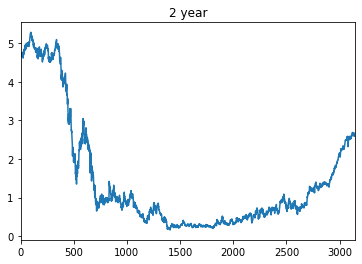

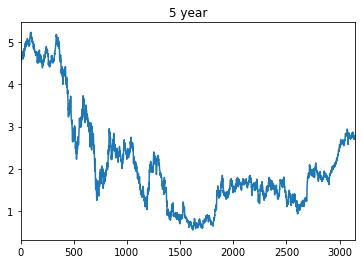

In [87]:
data['2Y'].plot()
plt.title('2 year')
plt.show()

data['5Y'].plot()
plt.title('5 year')
plt.show()

<div class="alert alert-block alert-info">Problem 1.2</div>

Do the 5T CMT rates  at two  consecutive dates  look independent of each other?

In [88]:
print('No, it seems like they have the same trend despite different levels of noice.')

No, it seems like they have the same trend despite different levels of noice.


### Auto Correlation of Rate Levels

For two time series of length $N$, the **auto correlation** function is defined by ([see](https://www.mathworks.com/help/econ/autocorrelation-and-partial-autocorrelation.html),
or [wikipedia](https://en.wikipedia.org/wiki/Autocorrelation)
is defined as

$$
    \rho_\tau(X,Y) = \frac{C_\tau(X,Y)}{C_0(X,Y)}
$$
where the shifted covariance $C_\tau(X,Y)$ is defined by
$$
    C_\tau(X,Y)= \sum_{t=0}^{N-\tau} (X_{t}-\mu_X)(Y_{t+\tau}-\mu_Y)
$$
and where $\mu_X$ and $\mu_Y$ are the sample means
\begin{align}
    \mu_X &=\frac{1}{N} \sum_{t=1}^N X_t \\
    \mu_Y &=\frac{1}{N} \sum_{t=1}^N Y_t \\
\end{align} 

Other definitions that differ by factors of order $\frac{1}{N-k}$ are used sometimes, but give similar results provided $N \gg k$. 

<div class="alert alert-block alert-info">Problem 1.3</div>
Compute the auto correlation of the 5Y CMT rate with itself for lags $\tau=0,1,\dots,5$.

What would you expect those correlations to be if rates for different times were independent from each other?

In [89]:
def acf(X, Y, t):
    if t==0:
        return 1
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    C_0 = np.sum((X-X_mean)*(Y-Y_mean))
    C_t = np.sum(((X-X_mean)[0:-t])*((Y-Y_mean)[t:]))
    return C_t / C_0

In [90]:
y5 = data['5Y'].values
result=np.zeros(6)
for t in range(6):
    result[t]=acf(y5,y5,t)
result

array([1.        , 0.99817712, 0.99642824, 0.99483342, 0.9931474 ,
       0.99148257])

<div class="alert alert-block alert-info">Problem 1.4</div>
Compare your results to the auto correlations computed by the function [`statsmodels.tsa.stattools.acf`](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.acf.html)

In [91]:
acf_2=statsmodels.tsa.stattools.acf(y5)[:6]
print(acf_2)
print('They look basically the same.')

[1.         0.99817712 0.99642824 0.99483342 0.9931474  0.99148257]
They look basically the same.


<div class="alert alert-block alert-info">Problem 1.5</div>

Use function [`statsmodels.graphics.tsaplots.plot_acf`](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html)
to plot the auto correlation for the 50 first $\tau$ lags (use the argument `lags` to that function )

The light blue shaded area in the graph is the confidence interval for the empirical auto-correlation assuming $X$ and $ Y$ times series
are uncorrelated at lag $\tau$.

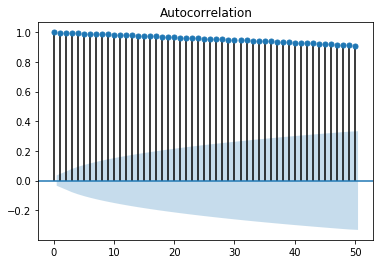

In [92]:
g=statsmodels.graphics.tsaplots.plot_acf(y5,lags=50)

<div class="alert alert-block alert-info">Problem 1.6</div>
It the auto correlation function significantly difference from zero up to lag 50?


In [93]:
print('Yes, they are significantly different from 0.')

Yes, they are significantly different from 0.


### Time series of the daily changes of the CMT 5Y rate

<div class="alert alert-block alert-info">Problem 1.7</div>
create a series  for the 1-lag difference of CMT rates (daily change of the rate)
$$
    \Delta_1 Y_t = Y_{t+1}-Y_{t}
$$

In [94]:
delta1_y = y5[1:]-y5[:-1]

<div class="alert alert-block alert-info">Problem 1.8</div>
Compute the auto correlation of the daily changes of the 5Y CMT Rate
$$
    \rho_\tau(\Delta_1 Y_t,\Delta_1 Y_t)
$$
for lags $\tau=0,1,\cdots 5$.


In [95]:
acf_3=statsmodels.tsa.stattools.acf(delta1_y)[:6]
print(acf_3)

[ 1.         -0.04138359 -0.0617599   0.03177387 -0.00863381 -0.03012158]


<div class="alert alert-block alert-info">Problem 1.9</div>
use `statsmodels.graphics.tsaplots.plot_acf` to visual investigate if the 50 first lag correlations are significantly different from zero.


First three lags exceed confidence interval, but only the first one is significantly different from 0.


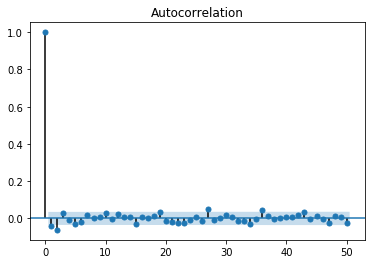

In [96]:
g2=statsmodels.graphics.tsaplots.plot_acf(delta1_y,lags=50)
print('First three lags exceed confidence interval, but only the first one is significantly different from 0.')

## Equity Market Indexes

<div class="alert alert-block alert-info"> Problem 2.0 </div>
Load the data "RussellIndexes.csv" file into a pandas dataframe.

In [98]:
data2=pd.read_csv(data_dir+"/RussellIndexes.csv")
data2.head()

,DATE,RU3000,RU2000,RU1000V,RU1000,RU2000V,RU1000G,RUMIDCAP,RU2000G,RU3000V,RMIDGR,RMIDVL,RU3000G
0,1995-05-31,1032.69,982.04,192.75,1036.37,1203.23,181.34,1242.92,1190.50,1000.00,338.75,328.35,1000.00
1,1995-06-01,1034.42,986.60,193.05,1037.77,1209.42,181.55,1246.34,1195.46,1001.91,339.98,329.00,1001.45
2,1995-06-02,1034.56,989.48,192.99,1037.61,1212.55,181.54,1247.38,1199.32,1001.90,340.23,329.30,1001.72
3,1995-06-05,1041.21,996.50,194.27,1044.21,1219.08,182.66,1259.02,1209.81,1008.40,343.85,331.99,1008.11
4,1995-06-06,1041.04,998.22,194.20,1043.82,1221.69,182.59,1258.83,1211.42,1008.28,343.47,332.23,1007.89


<div class="alert alert-block alert-info">Problem 2.1</div>
Plot the history of the RU3000 and RUMIDCAP equity indexes 
(the `plot()` function of the `pd.DataFrame` object by be useful)

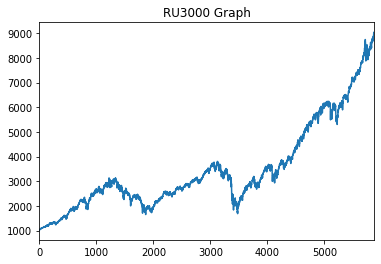

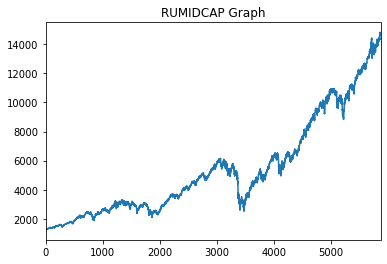

In [104]:
data2["RU3000"].plot()
plt.title('RU3000 Graph')
plt.show()
data2['RUMIDCAP'].plot()
plt.title('RUMIDCAP Graph')
plt.show()

<div class="alert alert-block alert-info">Problem 2.2</div>
Plot the history of the log of RU3000 and RUMIDCAP equity indexes 
(the `plot()` function of the `pd.DataFrame` object by be useful)

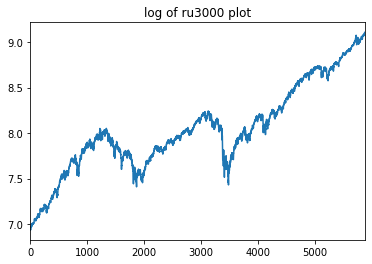

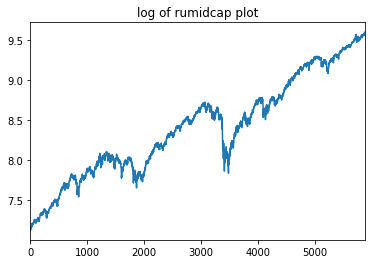

In [114]:
l_1 = np.log(data2['RU3000'])
l_2 = np.log(data2['RUMIDCAP'])
l_1.plot()
plt.title('log of ru3000 plot')
plt.show()
l_2.plot()
plt.title('log of rumidcap plot')
plt.show()

<div class="alert alert-block alert-info">Problem 2.3</div>
use `statsmodels.graphics.tsaplots.plot_acf` to visual investigate if the 50 first lag correlations  of the log of RU3000  are significantly different from zero.


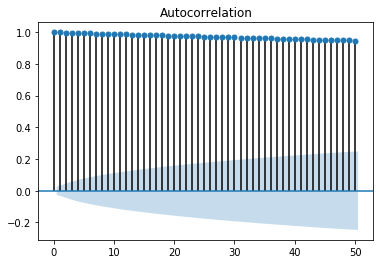

In [116]:
data_ru3000 = data2['RU3000'].values
g3=statsmodels.graphics.tsaplots.plot_acf(data_ru3000,lags=50)

In [118]:
print('Yes, they are significantly differnet from 0.')

Yes, they are significantly differnet from 0.


<div class="alert alert-block alert-info">Problem 2.4</div>
create a series for the 1-lag difference of the Russell 3000 Log levels
(the daily log returns of Rusell 3000).

Use `statsmodels.graphics.tsaplots.plot_acf` to investigate if there are significant auto correlations
for the first 50 lags of the daily log returns for Rusell 3000.

In [119]:
delta1_ru3000=data_ru3000[1:]-data_ru3000[:-1]

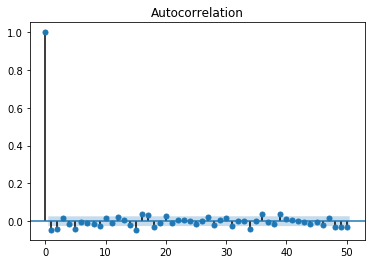

In [120]:
g4=statsmodels.graphics.tsaplots.plot_acf(delta1_ru3000,lags=50)

In [121]:
print('First three lags exceed the confidence interview, but only the first lag is significantly different from 0.')

First three lags exceed the confidence interview, but only the first lag is significantly different from 0.
